In [48]:
import datetime as dt

import pynextsim.openers as pnops
from pynextsim.netcdf_list import NetcdfList
from pynextsim.gridding import Grid
from pynextsim.irregular_grid_interpolator import IrregularGridInterpolator

import swarp_funs.mod_netcdf_utils as mnu

import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
# "opener" object are used in pynextsim to find files
# opener needs access to INPUT_OBS_DATA_DIR or INPUT_FORECAST_DATA_DIR env.vars.
# they should point to /Data/sim/data/ and /Data/nextsimf/data
# in our case opener is only needed as it contains projection information
# Create opener for observations
opener_obs = pnops.OPENER_DICT['OsisafConc']()

# Open netCDF with Moorings
# Moorings is neXtSIM gridded output for several dates
moorings = mnu.nc_getinfo('/data2/antonk/small_arctic_10km/20061115/Moorings.nc')
# Open netCDF with observations (just oe date)
nci_obs = mnu.nc_getinfo('/Data/sim/data/OSISAF_ice_conc/polstere/2006_nh_polstere/ice_conc_nh_polstere-100_multi_200611151200.nc')

# create grid for observations
# Grid is simlar to AreaDefinition
# NB: we have to provide information about projection to create Grid
obs_grid = Grid.init_from_nc_getinfo(nci_obs, projection = opener_obs.projection)

# get 2D matrices with lon,lat for Moorings
lon, lat = moorings.get_lonlat()
# convert to X,Y coordinates in observation projection
xy_mod = obs_grid.projection.pyproj(lon, lat)
# create Grid for Moorings
# shape is the same as for Moorings
# but projection of X,Y is for observations
grid = Grid(*xy_mod, bbox) 
# Create interpolator
irreg_grid_interp = IrregularGridInterpolator(*grid.xy, *obs_grid.xy)
# Get 2d matrix with variable from Moorings
mod_var = sic = moorings.get_var('Concentration', time_index=0).values
# reproject Moorings on observation grid
mod_var_pro = irreg_grid_interp.interp_field(mod_var)


reduce grid bbox:  [-2345314.2289673784, 1708456.1751212867, -1281384.3226373014, 2096757.8336000938]


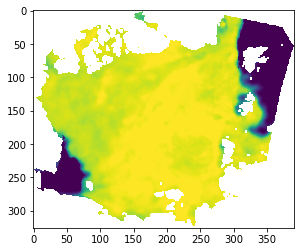

In [86]:
plt.imshow(mod_var)

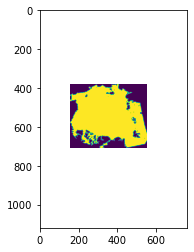

In [87]:
plt.imshow(mod_var_pro)

In [ ]:
# should be:

interpolator = GridGridInterpolator(moorings.area_def, nci_obs.area_def, method='NumpyBilinear')
mod_var_pro = interpolator.interp_field(mod_var)
